# <center><font color="PURPLE">Census Data Analysis</font><center>

**Import all necessary Libraries**

In [27]:
# Basic Libraries
import pandas as pd
import numpy as np
import math
import random

#Visualziation
from matplotlib import pyplot as plt
import seaborn as sns

# machine learning
from scipy.stats import linregress
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from sklearn import metrics
from scipy.stats import ttest_ind
from scipy.stats import t

# ignore warnings
import warnings
warnings.filterwarnings("ignore")  

### <center><font color="blue">Load The Dataset</font><center>

**Import the dataset**

In [2]:
# making the file path
file_path = "official.csv"

# read the  dataset and store in the variable census_df and check the top two rows of the dataset
census_df = pd.read_csv(file_path)
census_df.head(2)

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125


**Checking the Columns**

In [3]:
census_df.columns

Index(['State', 'Library ID', 'Submission Year', 'Library Name',
       'Street Address', 'City', 'Zip Code', 'Longitude', 'Latitude',
       'State Code', 'County Code', 'County', 'County Population',
       'Print_Collection_Expenditures', 'Digital_Collection_Expenditures',
       'Total Collection Expenditures', 'Total Operating Expenditures',
       'Print Collection', 'Digital Collection', 'Audio Collection',
       'Library Visits', 'Registered Users', 'Name', 'median_household_income',
       'total_population', 'median_age', 'per_capita', 'education_none',
       'education_high_school', 'education_ged', 'education_associates',
       'education_bachelors', 'education_masters', 'education_professional',
       'education_doctorate', 'state', 'zipcode', 'year',
       'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'edu

**Dataset Information**

In [4]:
#checking of size (rows and columns) of the dataset
print(f"There are {census_df.shape[0]} rows and {census_df.shape[1]} columns in the dataset ")

There are 9171 rows and 46 columns in the dataset 


In [5]:
#Basic information about the dataset
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            9171 non-null   object 
 1   Library ID                       9171 non-null   object 
 2   Submission Year                  9171 non-null   int64  
 3   Library Name                     9171 non-null   object 
 4   Street Address                   9171 non-null   object 
 5   City                             9171 non-null   object 
 6   Zip Code                         9171 non-null   int64  
 7   Longitude                        9171 non-null   float64
 8   Latitude                         9171 non-null   float64
 9   State Code                       9171 non-null   int64  
 10  County Code                      9171 non-null   int64  
 11  County                           9171 non-null   object 
 12  County Population   

In summary of dataset, has a total 205520 rows and 46 columns. Within the 46 Columns:

- 34 column are an float data type
- 5 column are an int data type
- 7 columns is an object data type
- There is no missing value in the dataset

### <center><font color="k">Exploratory Data Analysis</font><center>

**Extracting the Columns**

In [6]:
census_df_income_expenditures = census_df[["median_household_income", "Print_Collection_Expenditures", "Digital_Collection_Expenditures", 
           "Total Collection Expenditures", "Total Operating Expenditures"]]

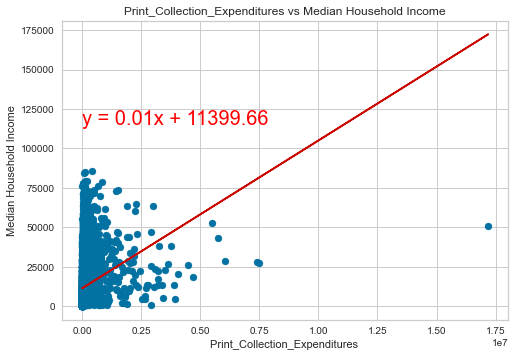

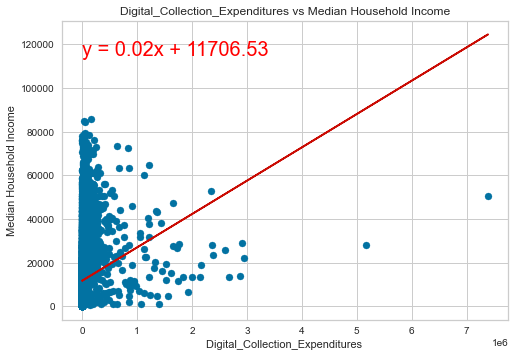

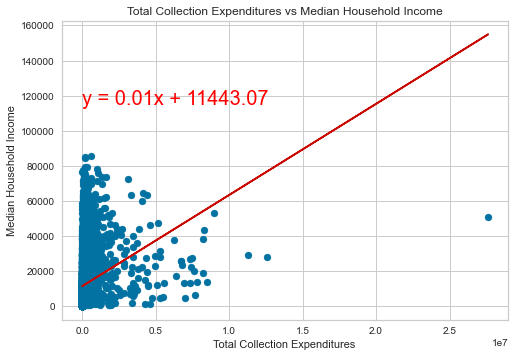

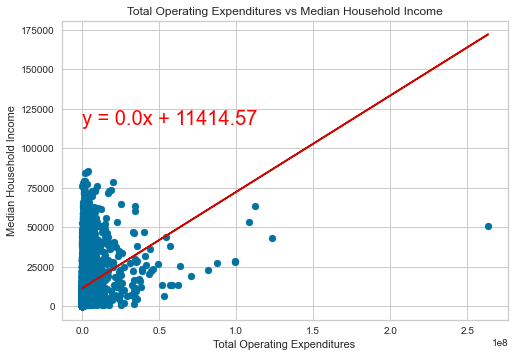

In [7]:
percentages= ['Print_Collection_Expenditures','Digital_Collection_Expenditures' ,'Total Collection Expenditures','Total Operating Expenditures']

for perc in percentages:
   
    # Add the linear regression equation and line to plot
    x_values = census_df_income_expenditures[perc]
    y_values = census_df_income_expenditures["median_household_income"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,115000),fontsize=20,color="red")
    plt.xlabel(f"{perc} ")
    plt.ylabel('Median Household Income')
    plt.title(f'{perc} vs Median Household Income')
    plt.show()

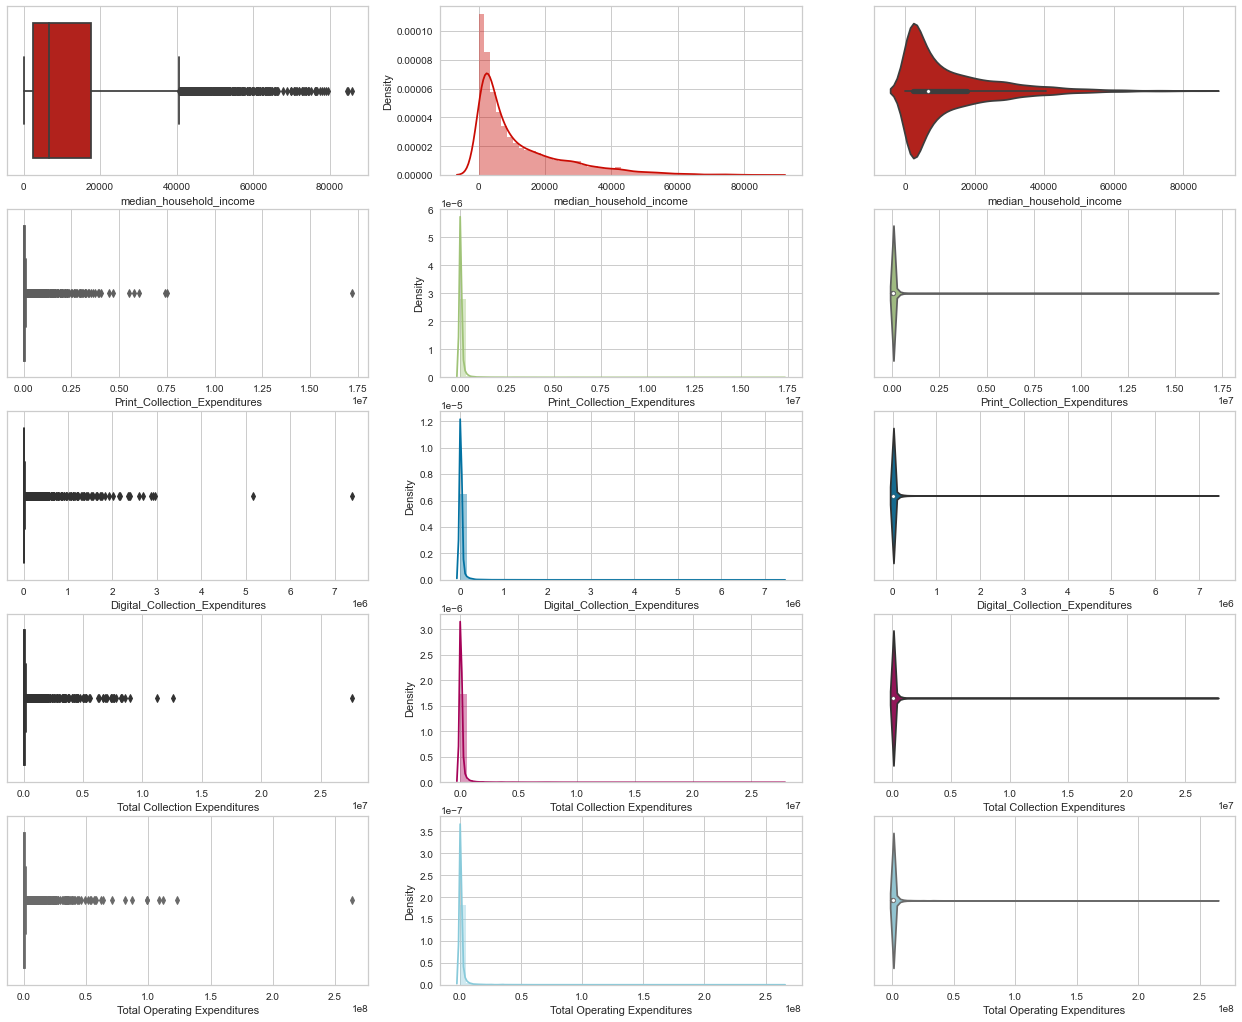

In [8]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(22, 18))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in census_df_income_expenditures:
    sns.boxplot(census_df_income_expenditures[var], orient = "h", color = colors[count], ax = axes[count,0])
    sns.distplot(census_df_income_expenditures[var], color = colors[count], ax = axes[count,1])
    sns.violinplot(census_df_income_expenditures[var], color = colors[count], ax = axes[count,2])
    count += 1

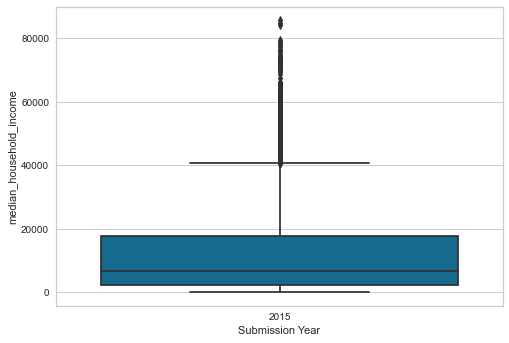

In [9]:
ax = sns.boxplot(x='Submission Year', y="median_household_income" , data = census_df)

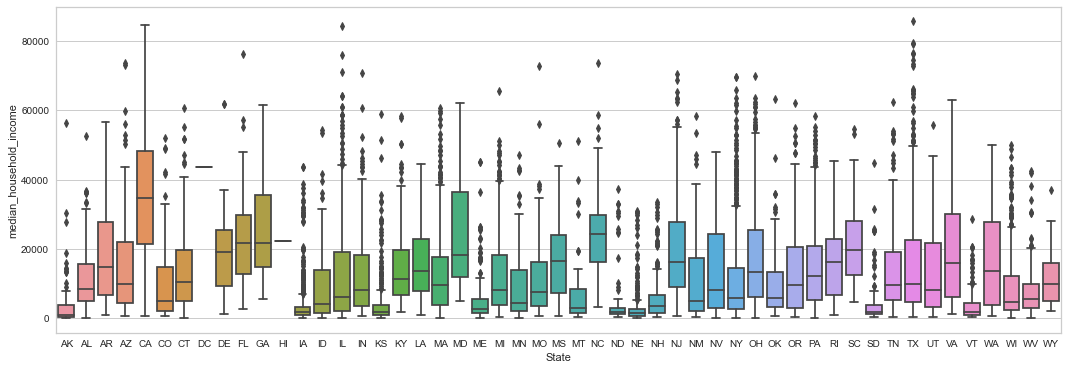

In [10]:
plt.figure(figsize = (18,6))
ax = sns.boxplot(x='State', y="median_household_income" , data = census_df)

**Correlation matrix**

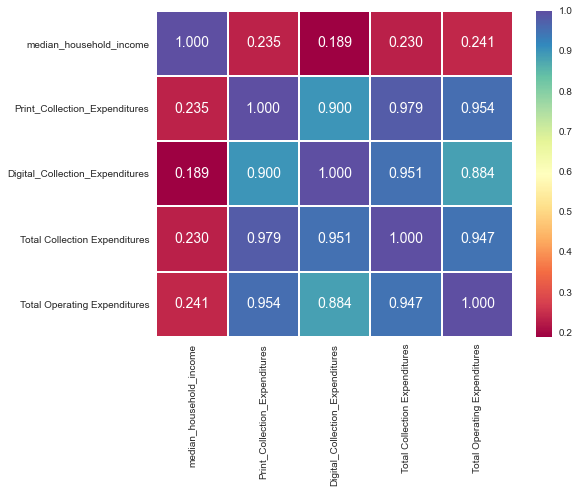

In [11]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(census_df_income_expenditures.corr(),
            xticklabels=census_df_income_expenditures.corr().columns.values,
            yticklabels=census_df_income_expenditures.corr().columns.values,
            annot=True,linewidths = 1, fmt = ".3f", annot_kws= {"size": 14}, cmap = "Spectral");

**Separeate the variables into  independent variables and dependent variable**

In [12]:
data = census_df_income_expenditures.copy()

In [13]:
#divide data into independent variables and the dependent variable
y = data.median_household_income.values
X = data.drop(['median_household_income'], axis = 1).values

**Splitting the data for Training and Testing (Test size=20%)**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#checking of size (rows) of the data
print(f"There are {census_df_income_expenditures.shape[0]} rows in the dataset")
#checking of size (rows) of the data
print(f"There are {X_train.shape[0]} rows in train data which is {round(X_train.shape[0]/census_df_income_expenditures.shape[0]*100, 0)} ")
#checking of size (rows) of the data
print(f"There are {X_test.shape[0]} rows in test data which is {round(X_test.shape[0]/census_df_income_expenditures.shape[0]*100, 0)} ")

There are 9171 rows in the dataset
There are 7336 rows in train data which is 80.0 
There are 1835 rows in test data which is 20.0 


**Linear Regression**

In [16]:
#Let's build our Linear Regression model
regressor = LinearRegression()  

# fit the model
regressor.fit(X_train, y_train)

#Predict values
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [17]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', regressor.intercept_)
print('Coefficients of Regression \t: a = ', regressor.coef_)
print()

Intercept of Regression 	: b =  11310.93791439032
Coefficients of Regression 	: a =  [-0.00594804 -0.02795531  0.01044567  0.00061034]



**Evaluation**

In [18]:
#Evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 

# MAE
print('Mean Absolute Error:\t', metrics.mean_absolute_error(y_test, y_test_pred))

# MSE
print('Mean Squared Error:\t', metrics.mean_squared_error(y_test, y_test_pred)) 

# RMSE
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:	 9931.617128792313
Mean Squared Error:	 166940423.98449647
Root Mean Squared Error:	 12920.542712459739


**Predicted vs Actual**

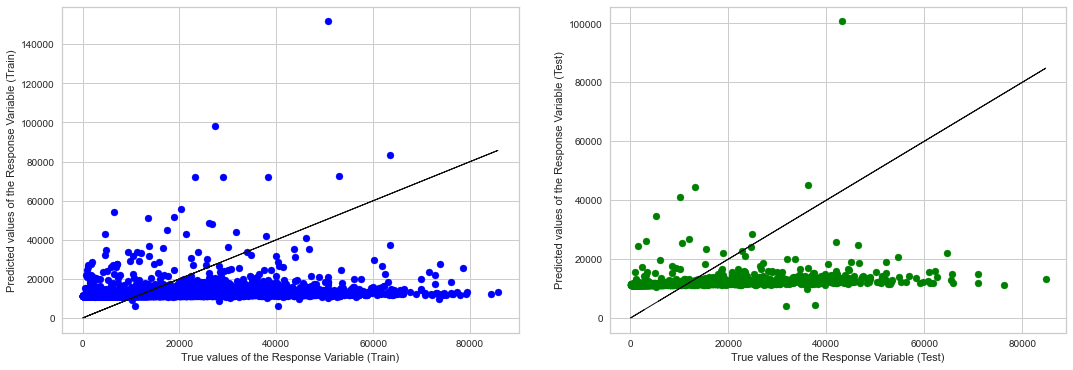

In [19]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color = "k")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color = "k")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

**Residual Plot**

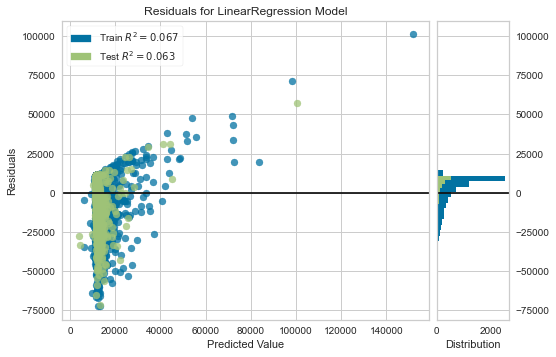

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**t_test**

In [25]:
t_stat, p = ttest_ind(X, y)
print(f't={t_stat}, p={p}')

t=[19.20393517  9.75776619 19.89188569 21.43783466], p=[2.15901314e-081 1.93770700e-022 3.96468523e-087 1.01950608e-100]


In [28]:
#right-tailed 
t.sf(t_stat, 18)

array([9.69846355e-14, 6.50390474e-09, 5.28843063e-14, 1.44801118e-14])